# Library

In [1]:
# plot learning curve of an xgboost model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import scoring, model
%reload_ext autoreload

# Classification

# Create dummy data

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [4]:
models,model_name,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,['xgb','lr','random_forest'],detail=False)

we have done with these models:
Random Forest
Xgboost
Logistic_Regression


# print score for binary label

comfusion matrix = 
[[49  4]
 [ 1 89]]


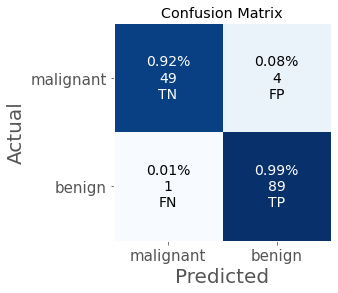


accuracy_score =  0.965
balanced_accuracy_score =  0.9567

precision score =  0.957
average precision score =  0.9533
recall score =  0.9889
Brier score loss (the smaller the better) =  0.0262

F1 score =  0.9727
F2 score =  0.9823
F3 score =  0.9856
F_beta score (0.5) =  0.9632
Matthews Correlation Coefficient score =  0.9251

AUC of Precision-Recall Curve on Testing =  0.9948
Best Threshold for Precision-Recall Curve = 0.420300
F-Score = 0.978
AUC of ROC =  0.992

Best Threshold for ROC = 0.698200
G-Mean = 0.966
Best Threshold with Youden’s J statistic = 0.698200

Cohens kappa =  0.9242
Gini =  0.9895

Expected Approval Rate =  0.6503
Expected Default Rate =  0.043

classification_report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97     

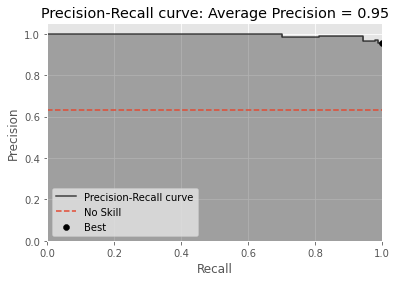

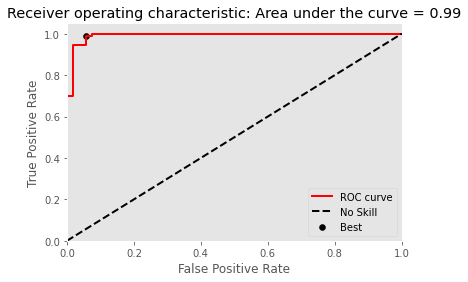


time span=  0:00:00.096979


In [49]:
cm = scoring.print_score(y_test,pred_model[1],y_probs=probs_model[1],
                    types='classification',labels=['malignant', 'benign'],
                    time1=time_1[1],time2=time_2[1],
                    X_train=None, y_train=None,X_test=None)

#  Regression

In [3]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# split the full train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)

In [7]:
model_ensemble, model_weighted_ensemble, model_ranking_ensemble = \
model.voting_ensembles_weighted(X_train_full, y_train_full, X_test, y_test,
                                "soft",'regression')

fit and evaluate each model
>rank 3 -> knn: -10016.853
>rank 2 -> cart: -13340.490
>rank 1 -> svm: -13819.499
Weighted Avg MAE: 104.877
Voting MAE: 102.774
Ranking Weighted MAE: 97.040


In [8]:
# make predictions
y_pred = model_weighted_ensemble.predict(X_test)


Mean Absolute Percentage Error (MAPE) = 16.51 %
R2                                    = 66.25 %
Mean Absolute Error (MAE)             = 104.88
Median Absolute Error (MAE)           = 84.88
Mean Square Error (MAE)               = 18032.6
Root Mean Absolute Error (RMAE)       = 10.24
Root Mean Absolute Error (RMSE)       = 134.29
Mean Absolute Scaled Error (MASE)     = 0.4
Max Error                             = 532.37
Tracking Signal                       = [ 0.06 -1.47 -0.34 ... -0.29  0.31 -0.19]


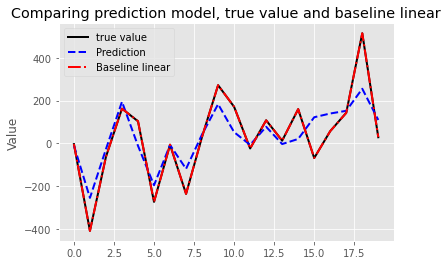


time span=  1


In [11]:
scoring.print_score(y_test,y_pred,y_pred,
                    types='regression',labels=None,time1=1,time2=2,
                    X_train=X_train_full, y_train=y_train_full,X_test=X_test)

# multiple model compare

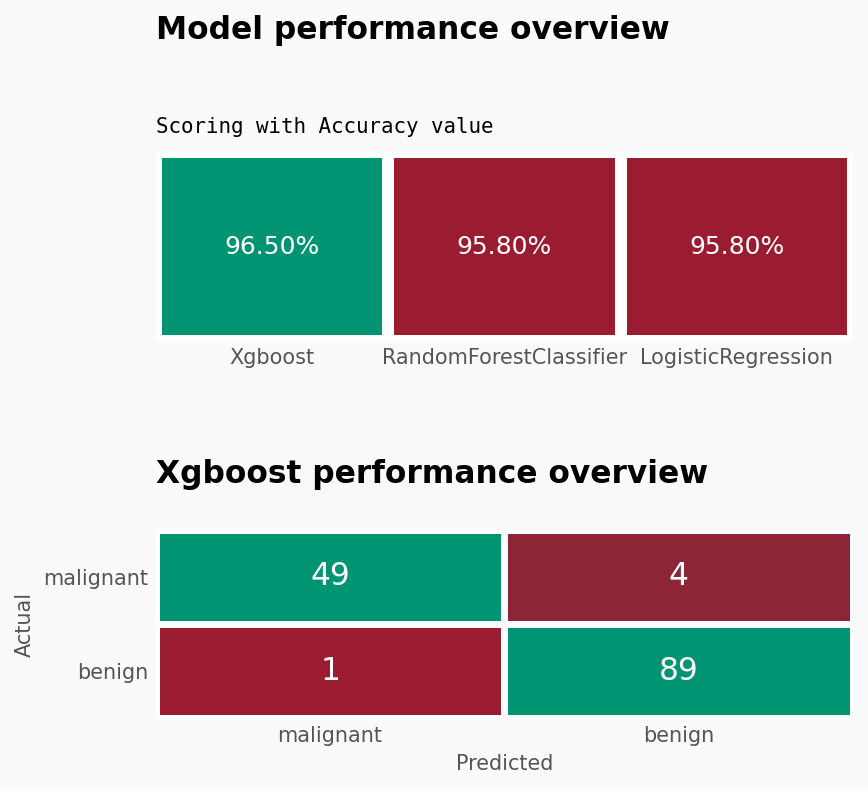

In [48]:
scoring.multiple_model(model_name,models,y_test,pred_model,['malignant', 'benign'])

# prob to label with threshold

In [27]:
scoring.prob_to_label_thres(probs_model[0], 0.8359)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Find the best treshold

In [62]:
scoring.compare_threshold(models[0],X_test,y_test,[1-0.8359,0.3,0.5,0.8359,0.9])

,0.1641,0.3000,0.5000,0.8359,0.9000
accuracy,0.9580,0.9580,0.9510,0.9580,0.9371
balanced_accuracy,0.9434,0.9473,0.9417,0.9589,0.9422
recall,1.0000,0.9889,0.9778,0.9556,0.9222
precision,0.9375,0.9468,0.9462,0.9773,0.9765
avg_precision,0.9375,0.9433,0.9392,0.9618,0.9495
F1,0.9677,0.9674,0.9617,0.9663,0.9486
F2,0.9494,0.9549,0.9524,0.9729,0.9651
F3,0.9434,0.9509,0.9493,0.9751,0.9708
F_beta_score,0.9494,0.9549,0.9524,0.9729,0.9651
matthews_score,0.9118,0.9103,0.8948,0.9112,0.8700


# Reliability diagram

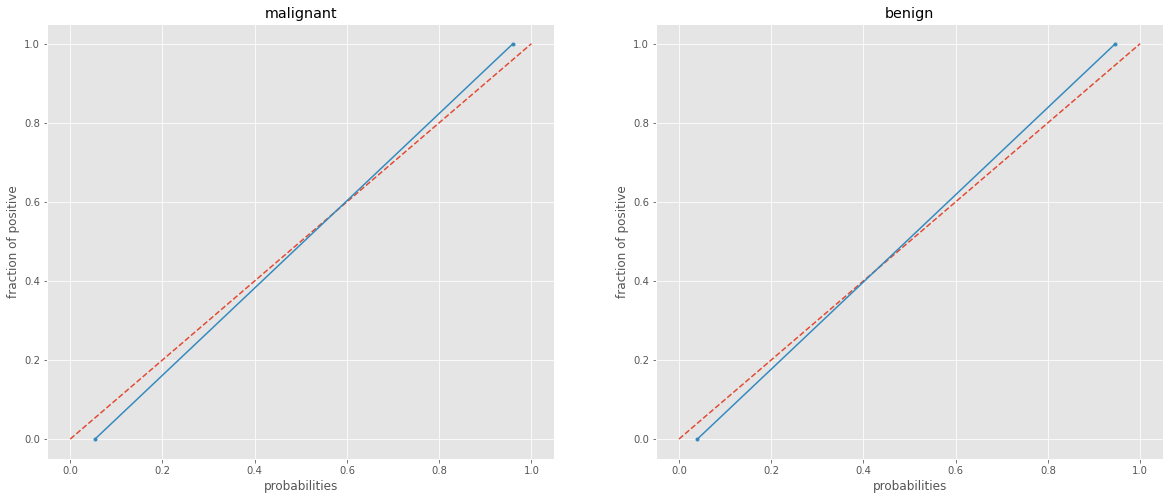

ECE SCORE FOR malignant = 0.048951
ECE SCORE FOR benign = 0.048951


({0: array([0.05376344, 0.96      ]), 1: array([0.04      , 0.94623656])},
 {0: array([0., 1.]), 1: array([0., 1.])})

In [34]:
scoring.reliability_diagram_simple(y_test,pred_model[0],['malignant', 'benign'],types='non_dl')

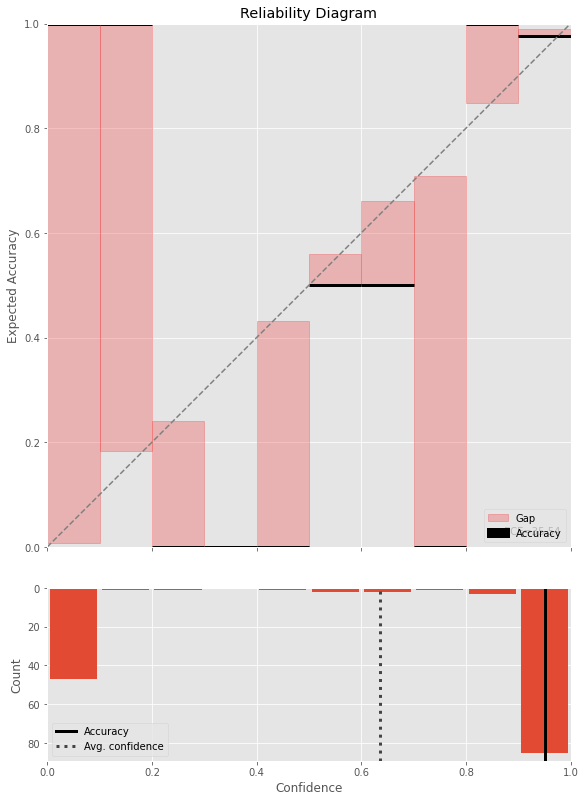

In [36]:
scoring.reliability_diagram(y_test,pred_model[0],probs_model[0])

# Generalizing confusion matrix

In [8]:
cf_matrix = np.asarray([
                    [5,1,0,0,0,0],
                    [0,5,0,0,0,0],
                    [0,1,5,1,0,0],
                    [0,0,0,5,0,0],
                    [0,0,0,0,5,0],
                    [0,0,1,0,0,5]])

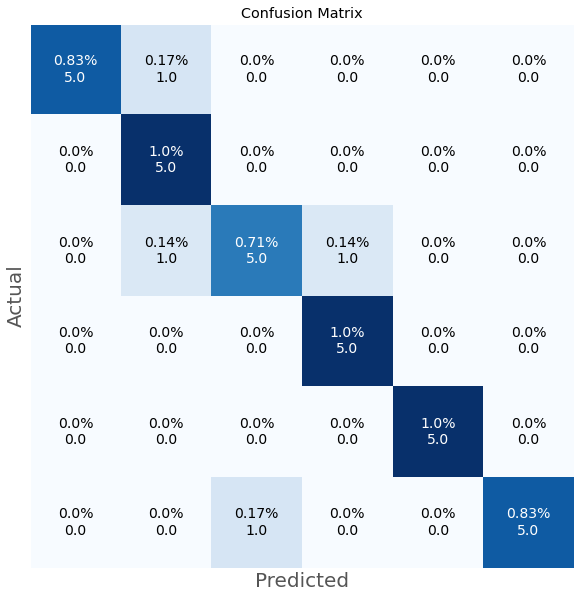

In [14]:
gen_cfmatrix = scoring.generalize_cfmatrix(cf_matrix, 6,labels=None)

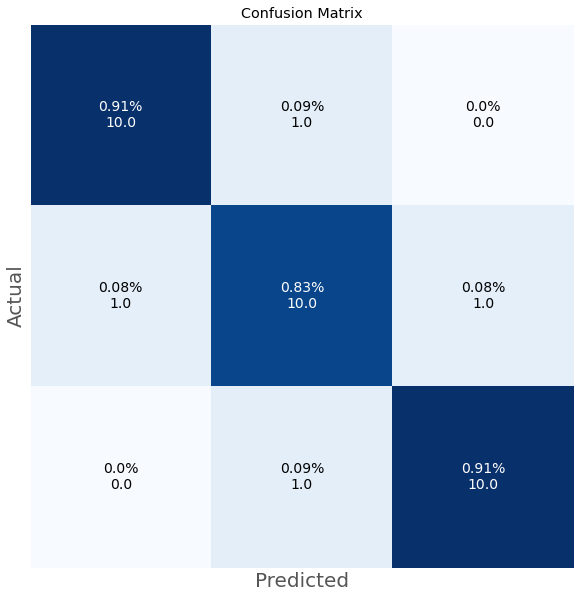

In [15]:
gen_cfmatrix = scoring.generalize_cfmatrix(cf_matrix, 3,labels=None)

# Decile Plots and KS statistic

In [11]:
decile_train,decile_test = scoring.deciling_plot(models[0],X_train,
                                                 y_train,X_test,y_test,
                                                 return_type='decile')

In [12]:
decile_train

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,43,43,0,100.000000,43,0,16.104869,0.000000,16.104869
2.0,42,42,0,100.000000,85,0,31.835206,0.000000,31.835206
3.0,43,43,0,100.000000,128,0,47.940075,0.000000,47.940075
4.0,42,42,0,100.000000,170,0,63.670412,0.000000,63.670412
5.0,43,43,0,100.000000,213,0,79.775281,0.000000,79.775281
6.0,42,42,0,100.000000,255,0,95.505618,0.000000,95.505618
7.0,43,12,31,27.906977,267,31,100.000000,19.496855,80.503145
8.0,42,0,42,0.000000,267,73,100.000000,45.911950,54.088050


In [13]:
decile_test

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,15,15,0,100.000000,15,0,16.666667,0.000000,16.666667
2.0,14,14,0,100.000000,29,0,32.222222,0.000000,32.222222
3.0,14,14,0,100.000000,43,0,47.777778,0.000000,47.777778
4.0,14,14,0,100.000000,57,0,63.333333,0.000000,63.333333
5.0,14,14,0,100.000000,71,0,78.888889,0.000000,78.888889
6.0,15,13,2,86.666667,84,2,93.333333,3.773585,89.559748
7.0,14,6,8,42.857143,90,10,100.000000,18.867925,81.132075
8.0,14,0,14,0.000000,90,24,100.000000,45.283019,54.716981


In [14]:
scores_train, scores_test = scoring.deciling_plot(models[0],X_train,
                                                 y_train,X_test,y_test,
                                                 return_type='score')

In [78]:
scores_train.loc[]

,SCORE,DECILE,TARGET,NONTARGET
0,0.00,10.0,0,1
1,1.00,4.0,1,0
2,0.00,10.0,0,1
3,0.00,10.0,0,1
4,0.00,10.0,0,1
...,...,...,...,...
421,0.17,7.0,0,1
422,0.00,9.0,0,1
423,0.01,8.0,0,1
424,0.00,9.0,0,1


In [79]:
scores_test

,SCORE,DECILE,TARGET,NONTARGET
0,1.00,3.0,1,0
1,0.00,10.0,0,1
2,0.61,7.0,1,0
3,0.93,6.0,1,0
4,0.68,7.0,0,1
...,...,...,...,...
138,0.83,6.0,1,0
139,0.99,3.0,1,0
140,1.00,1.0,1,0
141,0.93,5.0,1,0


# Lift chart, Actual vs predicted and Gains chart

,DECILE,ACTUAL,PRED,DIST_TAR,DIST_NONTAR,SPREAD,LIFT @decile,LIFT
0,10.0,100.000000,100.000000,16.104869,0.000000,16.104869,NaN,1.610487
1,20.0,100.000000,100.000000,31.835206,0.000000,31.835206,157.303371,1.591760
2,30.0,100.000000,100.000000,47.940075,0.000000,47.940075,161.048689,1.598002
3,40.0,100.000000,99.357143,63.670412,0.000000,63.670412,157.303371,1.591760
4,50.0,100.000000,98.069767,79.775281,0.000000,79.775281,161.048689,1.595506
5,60.0,100.000000,92.166667,95.505618,0.000000,95.505618,157.303371,1.591760
6,70.0,27.906977,33.813953,100.000000,19.496855,80.503145,44.943820,1.428571
7,80.0,0.000000,2.571429,100.000000,45.911950,54.088050,0.000000,1.250000
8,90.0,0.000000,0.023256,100.000000,72.955975,27.044025,0.000000,1.111111
9,100.0,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,1.000000


,DECILE,ACTUAL,PRED,DIST_TAR,DIST_NONTAR,SPREAD,LIFT @decile,LIFT
0,10.0,100.000000,100.000000,16.666667,0.000000,16.666667,NaN,1.666667
1,20.0,100.000000,100.000000,32.222222,0.000000,32.222222,155.555556,1.611111
2,30.0,100.000000,99.214286,47.777778,0.000000,47.777778,155.555556,1.592593
3,40.0,100.000000,98.285714,63.333333,0.000000,63.333333,155.555556,1.583333
4,50.0,100.000000,94.142857,78.888889,0.000000,78.888889,155.555556,1.577778
5,60.0,86.666667,80.400000,93.333333,3.773585,89.559748,144.444444,1.555556
6,70.0,42.857143,40.571429,100.000000,18.867925,81.132075,66.666667,1.428571
7,80.0,0.000000,3.785714,100.000000,45.283019,54.716981,0.000000,1.250000
8,90.0,0.000000,0.285714,100.000000,71.698113,28.301887,0.000000,1.111111
9,100.0,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,1.000000


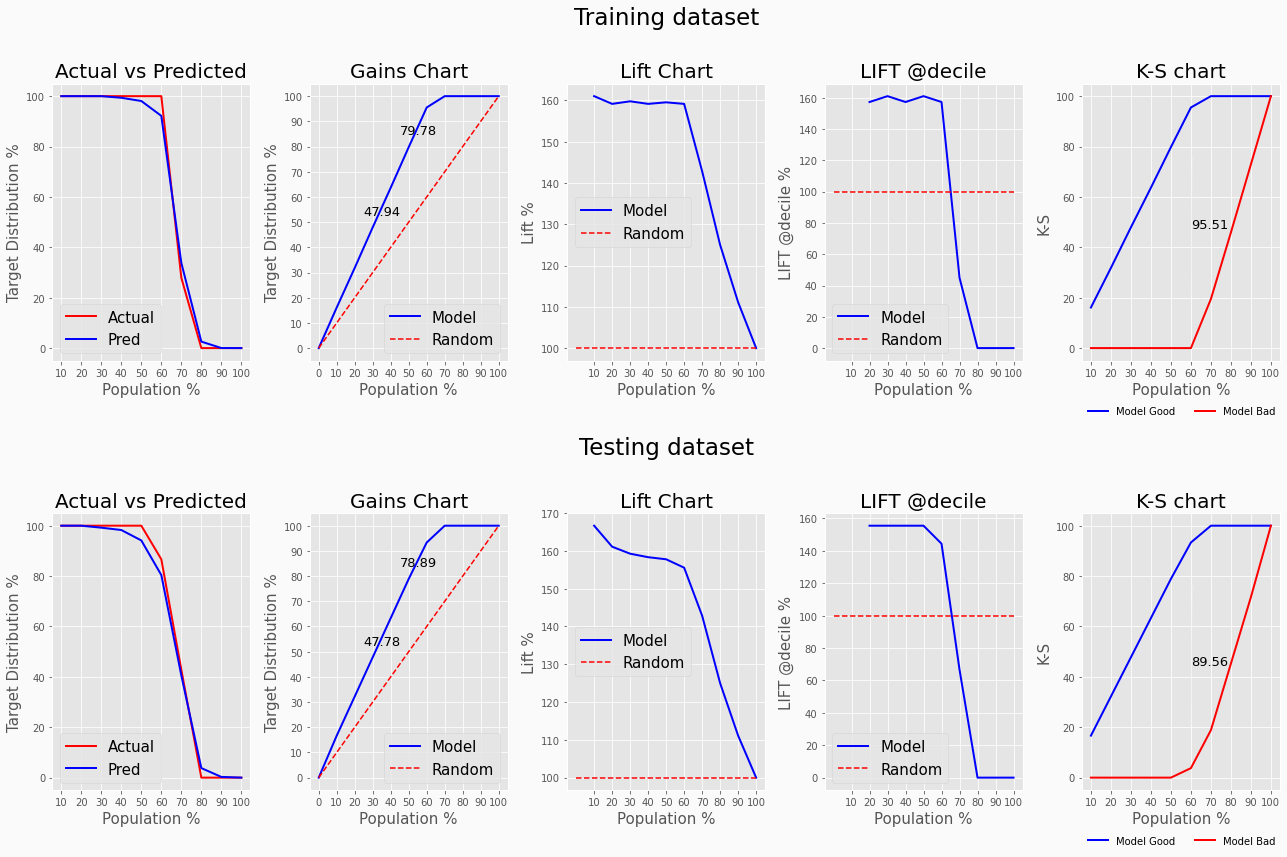

In [15]:
scoring.gains_plot(models[0],X_train,y_train,X_test,y_test)

# Multiple confusion matrix

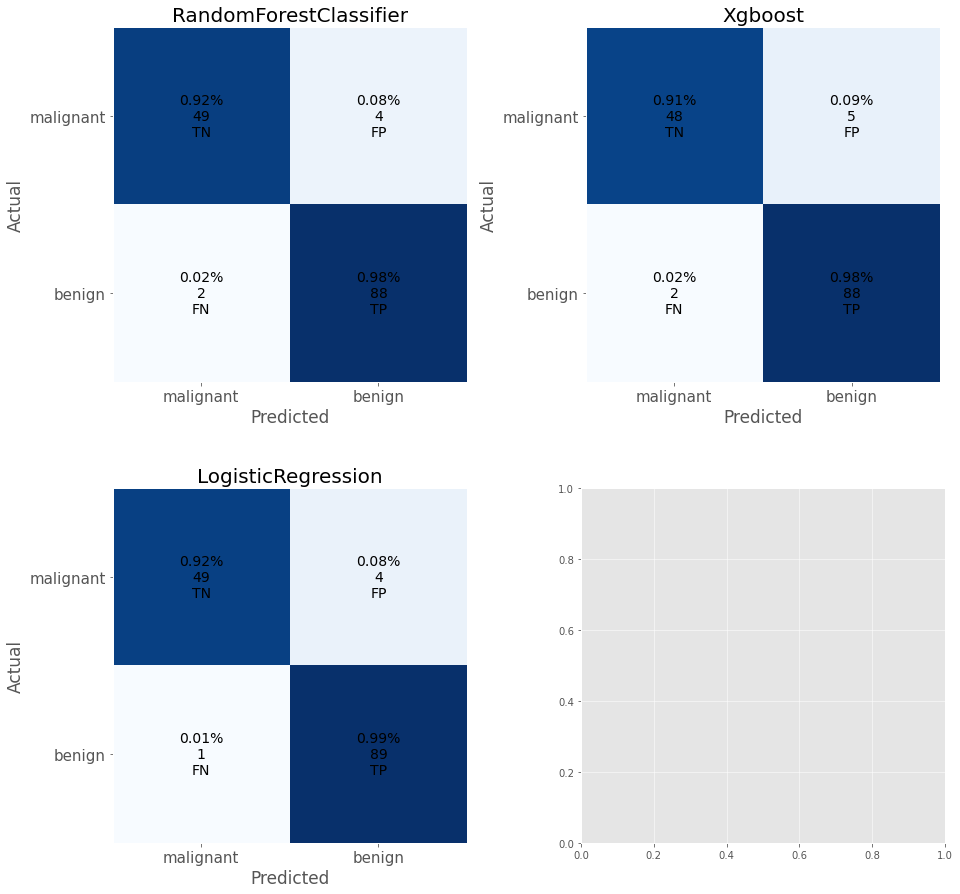

In [93]:
scoring.multiple_cm(labels=['malignant', 'benign'],
                                list_name=names_model,list_pred=pred_model,
                                y_test=y_test,shape=[2,2])

# Learning Curve

In [98]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

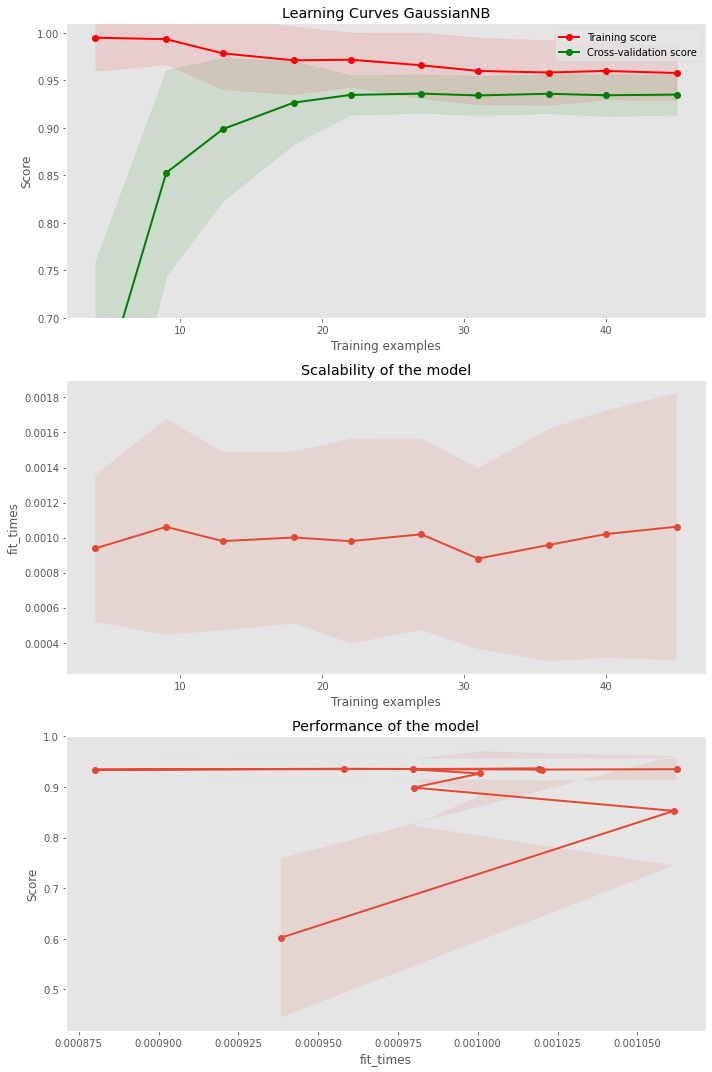

In [103]:
scoring.plot_learning_curve(cancer.data, cancer.target,"GaussianNB",nb,50,0.2)

# Probability Distribution

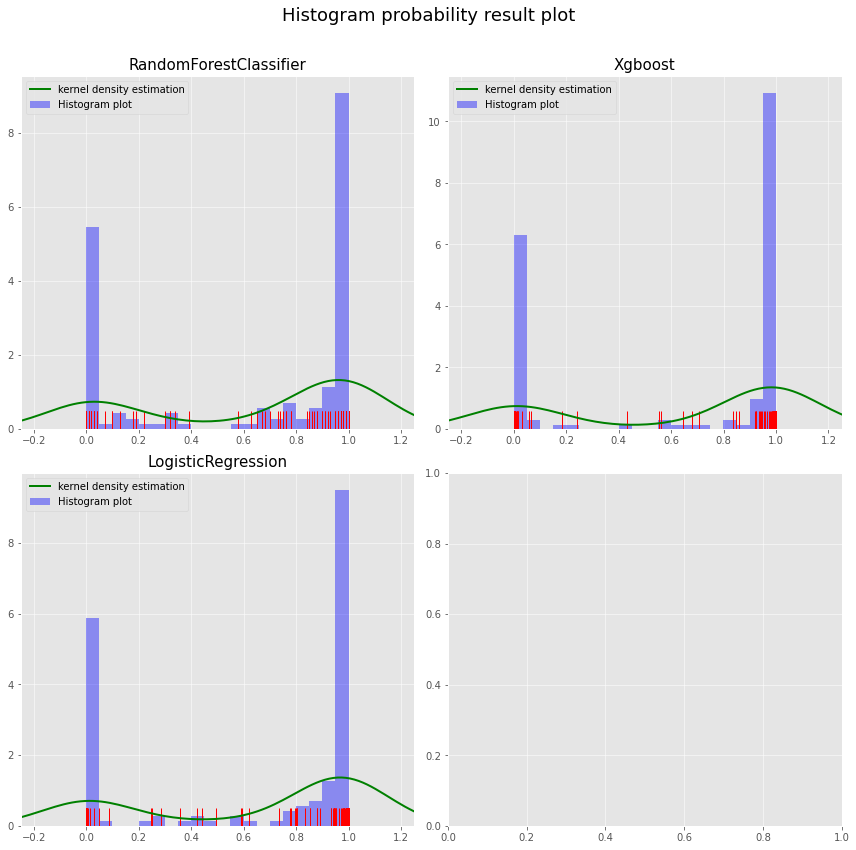

In [156]:
scoring.proba_dist(probs_model,20,names_model,amount='all',shape=[2,2])

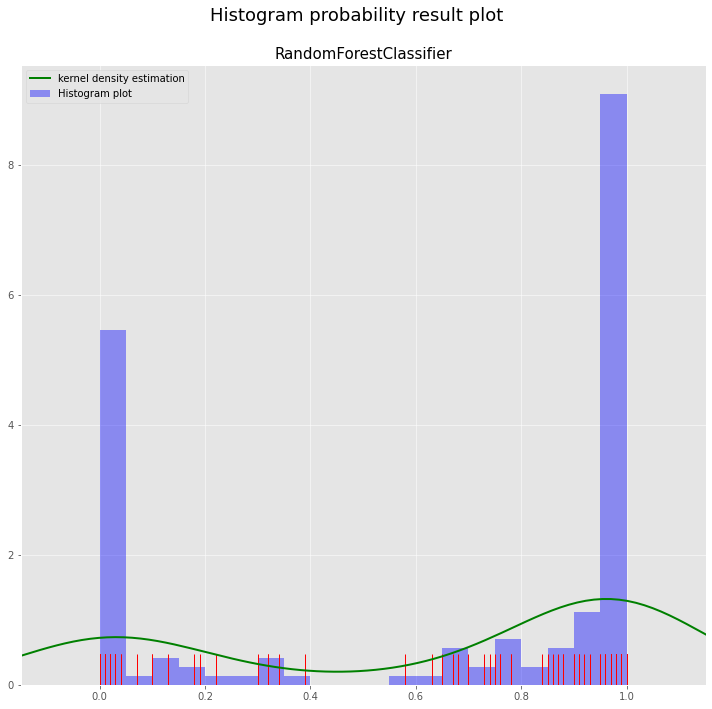

In [157]:
scoring.proba_dist(probs_model[0],20,names_model[0],amount='single',shape=[2,2])

# Multiple ROC and PR plot

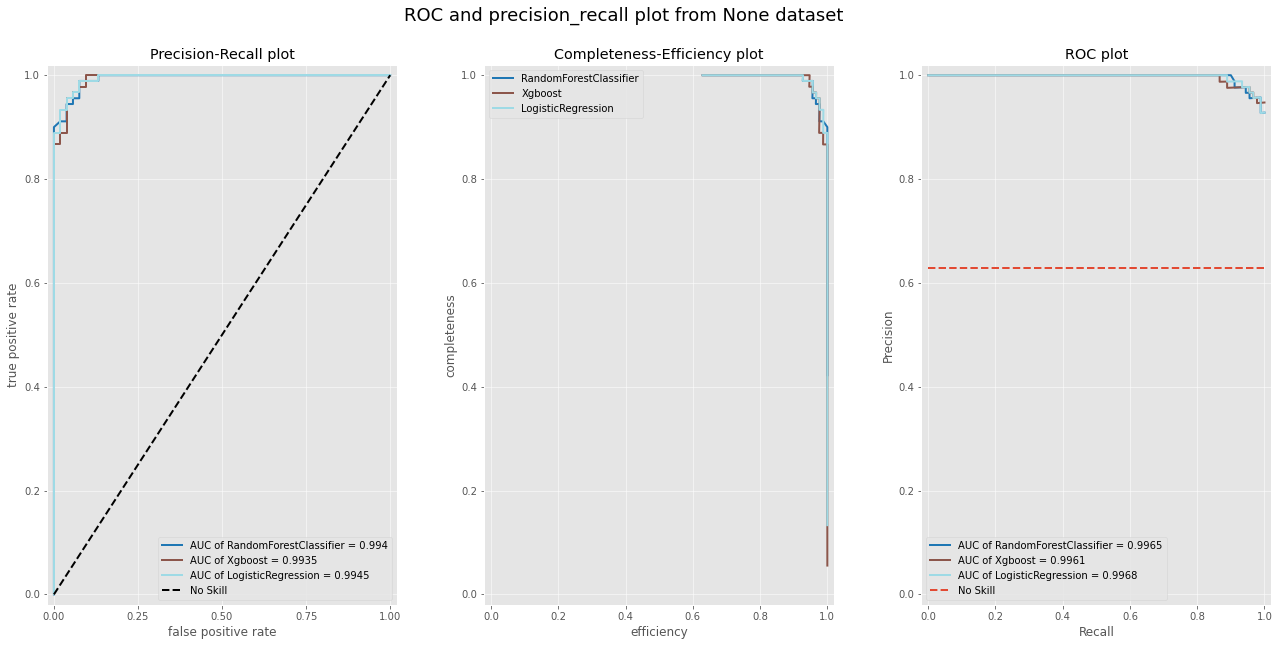

In [184]:
scoring.multiple_roc_pr(y_test,names_model,probs_model,pred_model)

# Multiple training model

In [47]:
result,proba = model.cv_model_train(X_train, y_train,
                                      ['all'],n_splits=5)

Finished training for model:
Decision Tree
Random Forest
Ada Boosting
Gradient Boosting
[11:53:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

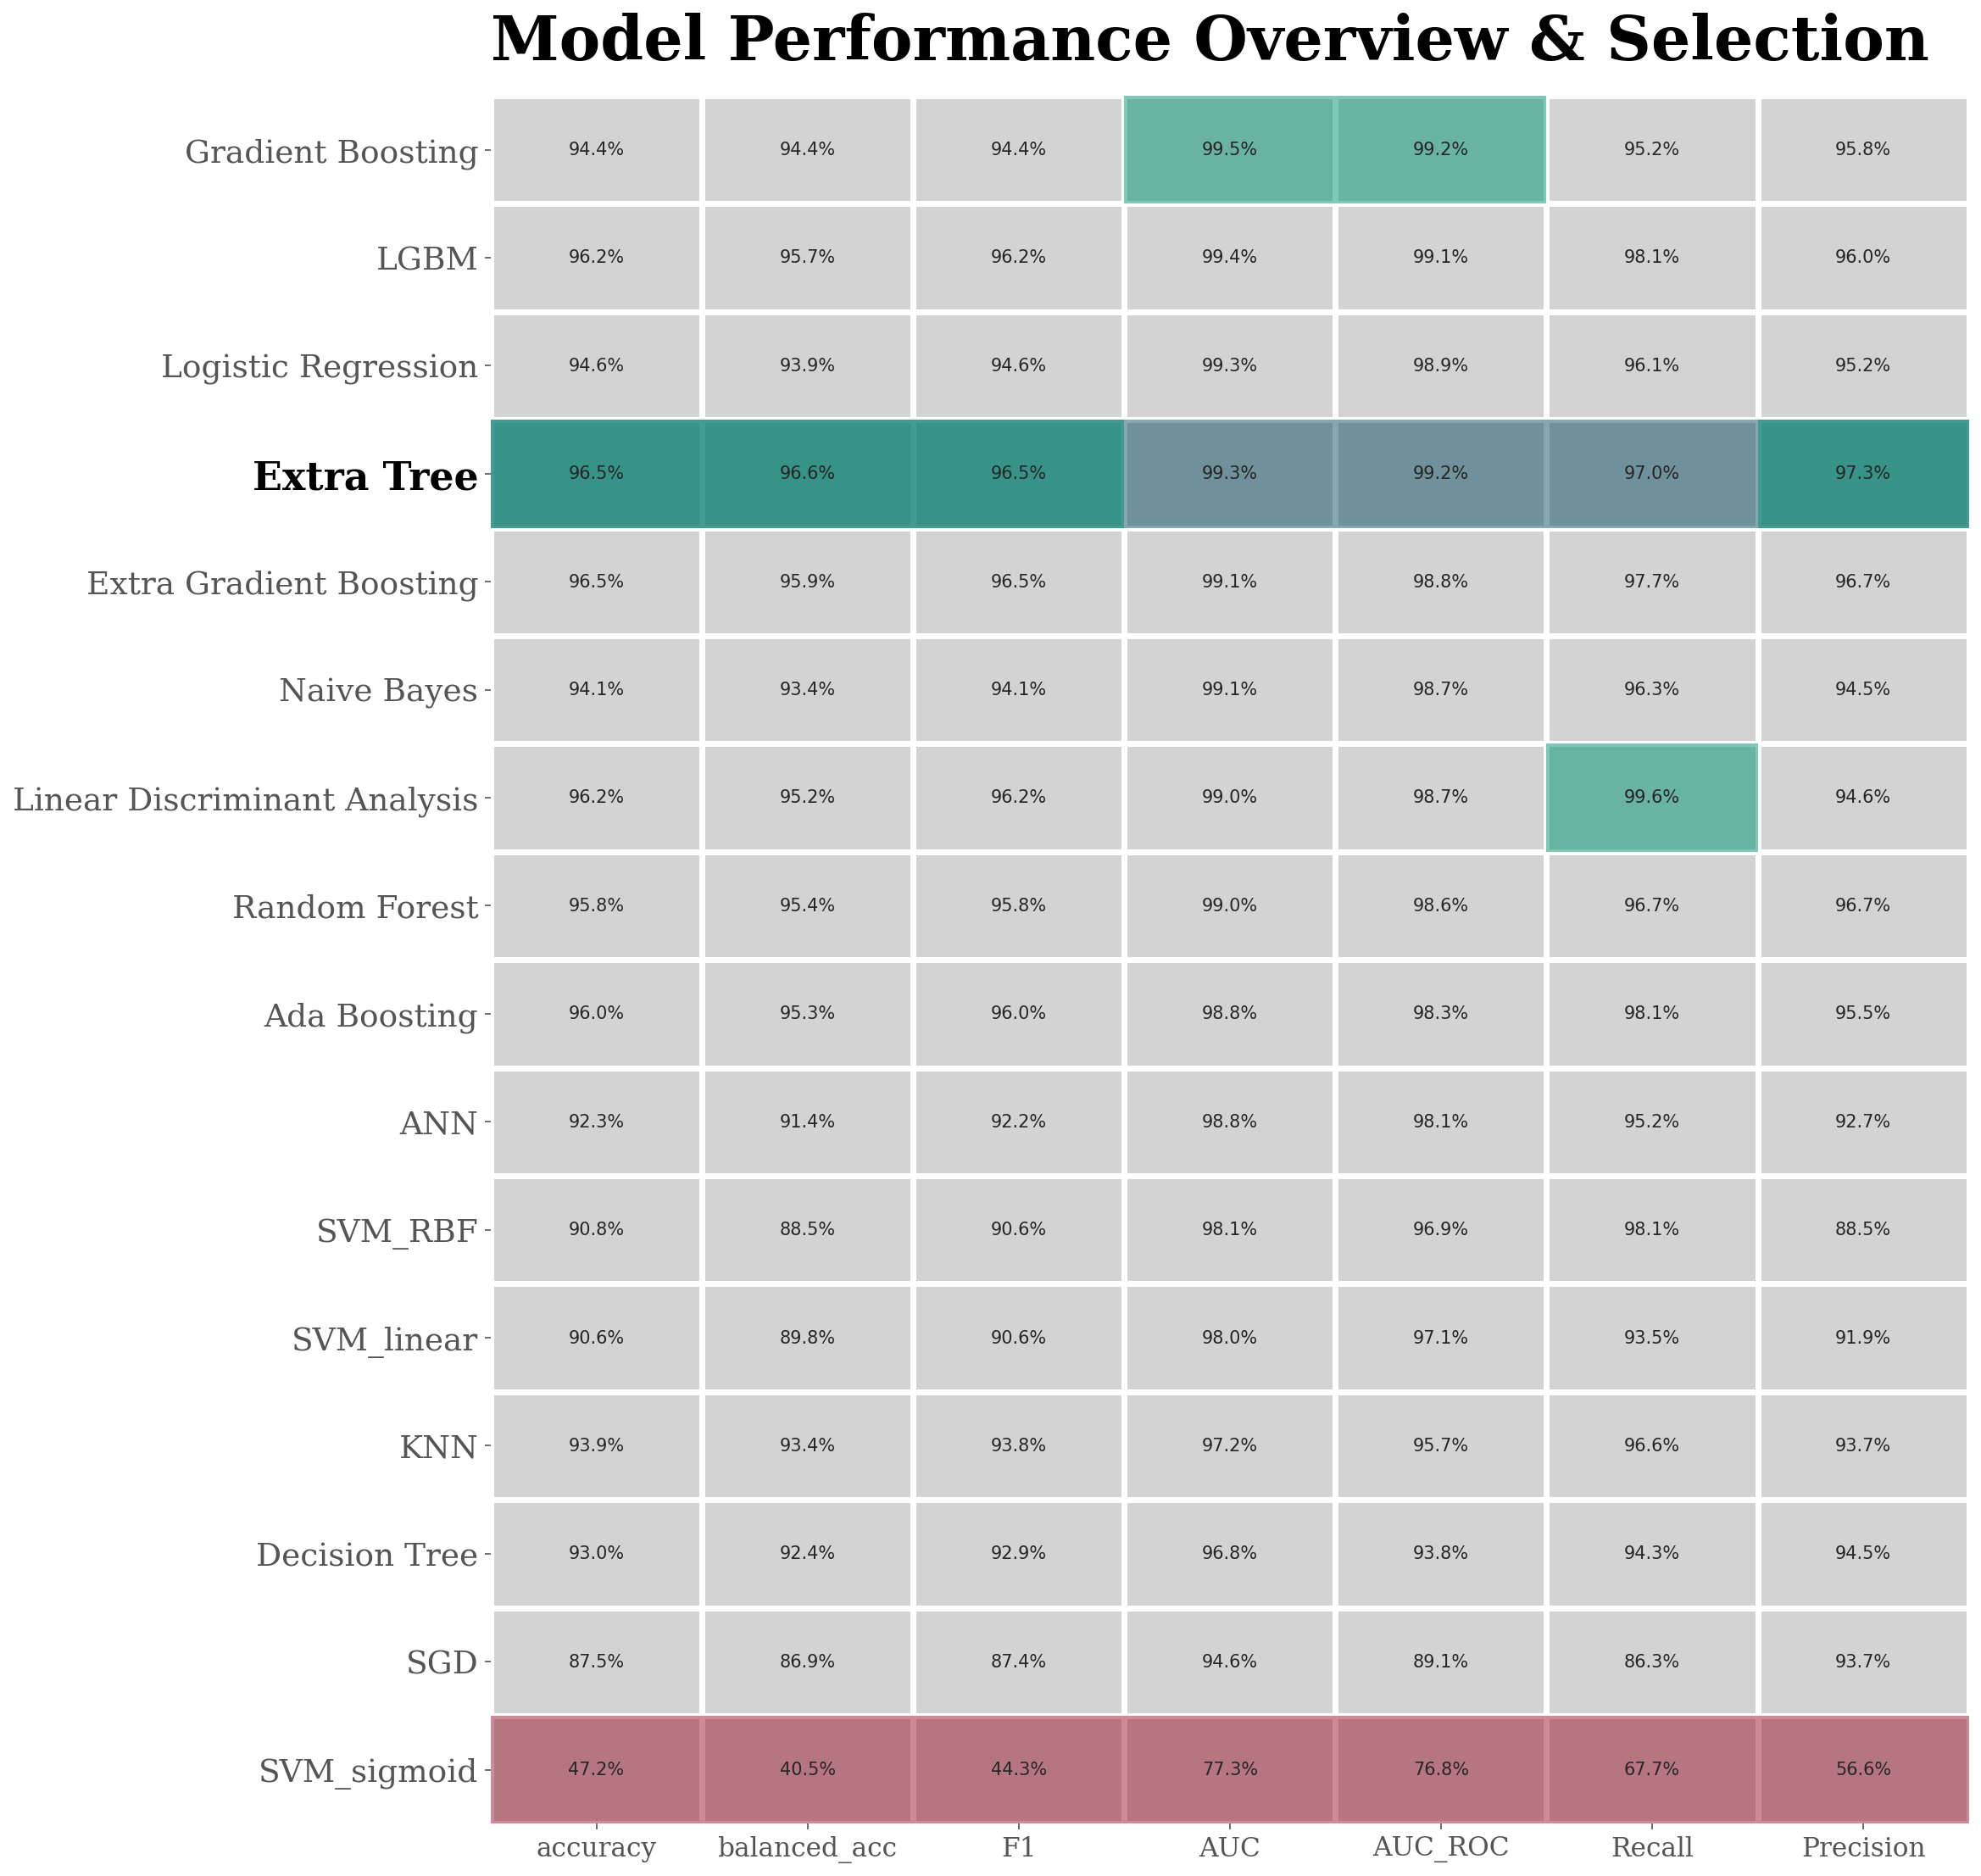

In [63]:
score = 'accuracy'
col = ["accuracy","balanced_acc","F1","AUC","AUC_ROC","Recall","Precision"]
scoring.multiple_training_model(result,score,col)